In [ ]:
# Import Dependencies 
import pandas as pd

In [ ]:
# Import Dataset
path = './df_game_team_officials_inactive_players_details.csv'
df_game_team_officials_inactive_players_details = pd.read_csv(path)

In [ ]:
# Check first 5 rows of dataset
df_game_team_officials_inactive_players_details.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,last_name_x,jersey_num_x,player_id,first_name_y,last_name_y,jersey_num_y,team_id,team_city,team_name,team_abbreviation
0,21996,1610612739,CLE,Cleveland Cavaliers,29600213,1996-11-30 00:00:00,CLE vs. ORL,L,240,34.0,...,Javie,29.0,32,Clifford,Rozier,44.0,1610612753,Orlando,Magic,ORL
1,21996,1610612739,CLE,Cleveland Cavaliers,29600213,1996-11-30 00:00:00,CLE vs. ORL,L,240,34.0,...,Capers,19.0,32,Clifford,Rozier,44.0,1610612753,Orlando,Magic,ORL
2,21996,1610612739,CLE,Cleveland Cavaliers,29600213,1996-11-30 00:00:00,CLE vs. ORL,L,240,34.0,...,Durham,31.0,32,Clifford,Rozier,44.0,1610612753,Orlando,Magic,ORL
3,22000,1610612739,CLE,Cleveland Cavaliers,20000089,2000-11-11 00:00:00,CLE vs. WAS,W,240,30.0,...,Nunez,28.0,445,Wesley,Person,1.0,1610612739,Cleveland,Cavaliers,CLE
4,22000,1610612739,CLE,Cleveland Cavaliers,20000089,2000-11-11 00:00:00,CLE vs. WAS,W,240,30.0,...,Palmer,66.0,445,Wesley,Person,1.0,1610612739,Cleveland,Cavaliers,CLE


# Visualizing Dataset

In [ ]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the Style
plt.style.use('seaborn')

/tmp/ipykernel_99/1863833068.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


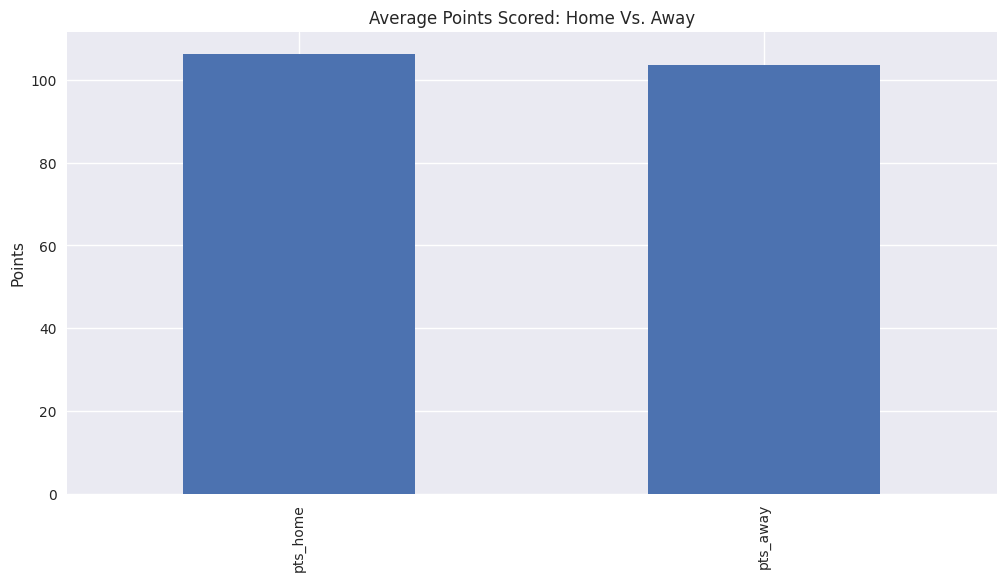

In [ ]:
# 1. Bar plot of average points scored by home and away teams
plt.figure(figsize=(12, 6))
avg_pts = df_game_team_officials_inactive_players_details[['pts_home', 'pts_away']].mean()
avg_pts.plot(kind='bar')
plt.title('Average Points Scored: Home Vs. Away')
plt.ylabel('Points')
plt.show()

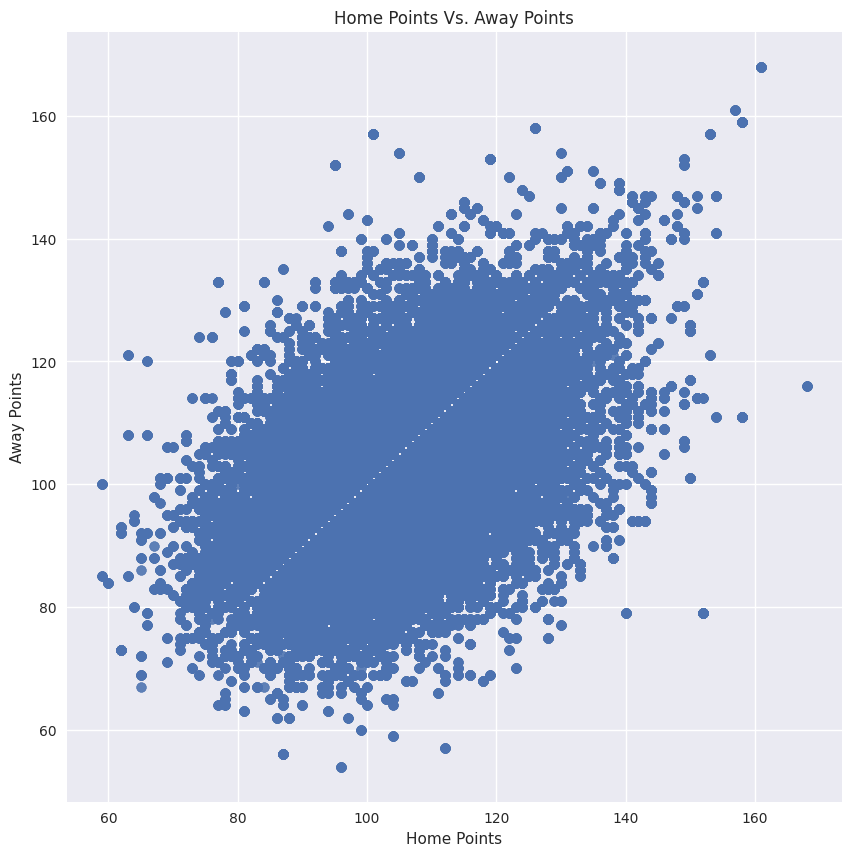

In [ ]:
# 2. Scatter plot of home vs. away points
plt.figure(figsize=(10, 10))
plt.scatter(df_game_team_officials_inactive_players_details['pts_home'],
            df_game_team_officials_inactive_players_details['pts_away'],
            alpha=0.5
)
plt.title('Home Points Vs. Away Points')
plt.xlabel('Home Points')
plt.ylabel('Away Points')
plt.show()

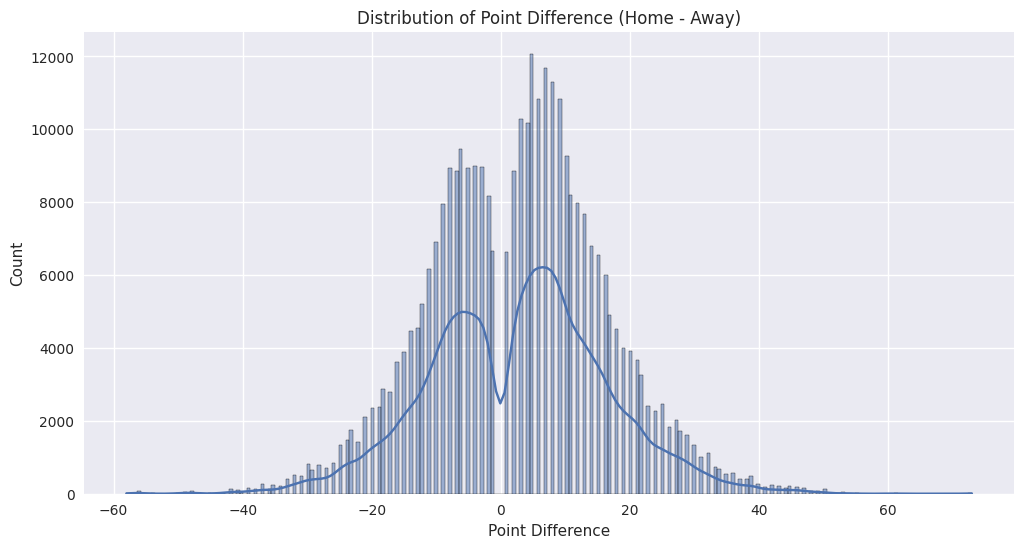

In [ ]:
# 3. Histogram of point difference (home - away)
plt.figure(figsize=(12, 6))
sns.histplot(df_game_team_officials_inactive_players_details['pts_home'] - df_game_team_officials_inactive_players_details['pts_away'],
             kde=True
)
plt.title('Distribution of Point Difference (Home - Away)')
plt.xlabel('Point Difference')
plt.show()

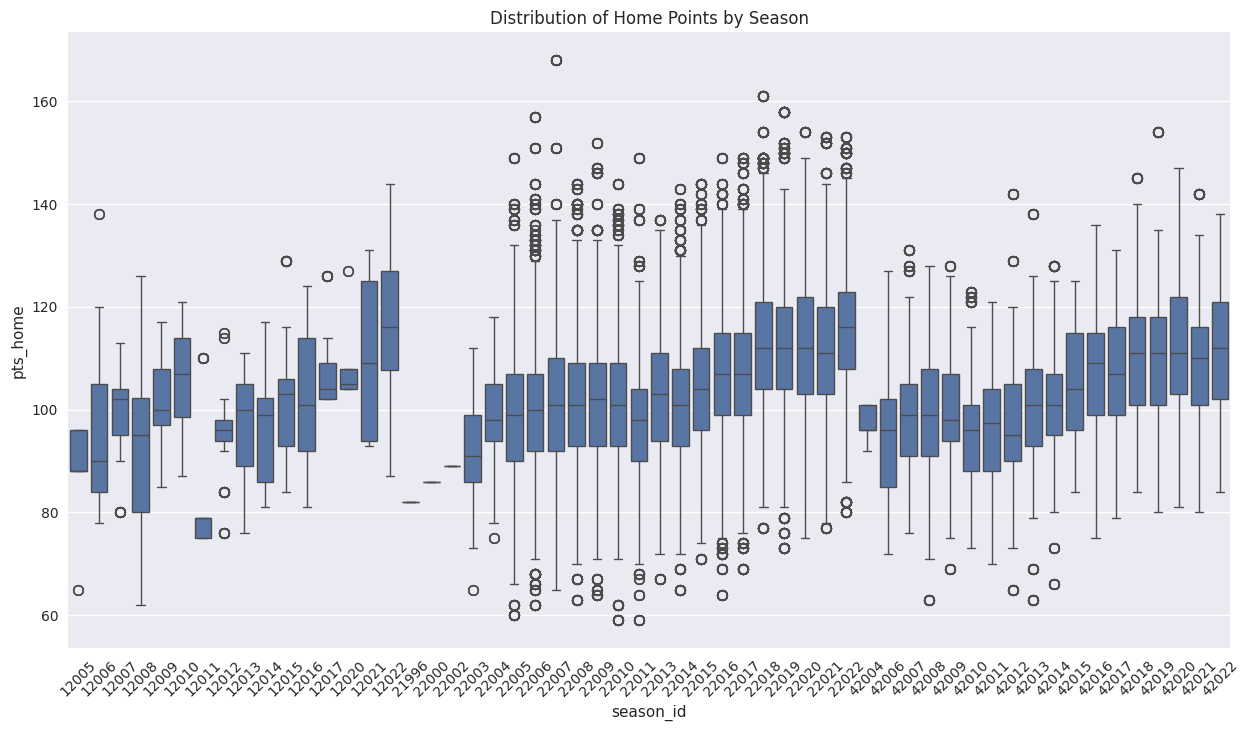

In [ ]:
# 4. Box plot of points by season
plt.figure(figsize=(15, 8))
sns.boxplot(x='season_id', y='pts_home', data=df_game_team_officials_inactive_players_details)
plt.title('Distribution of Home Points by Season')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np

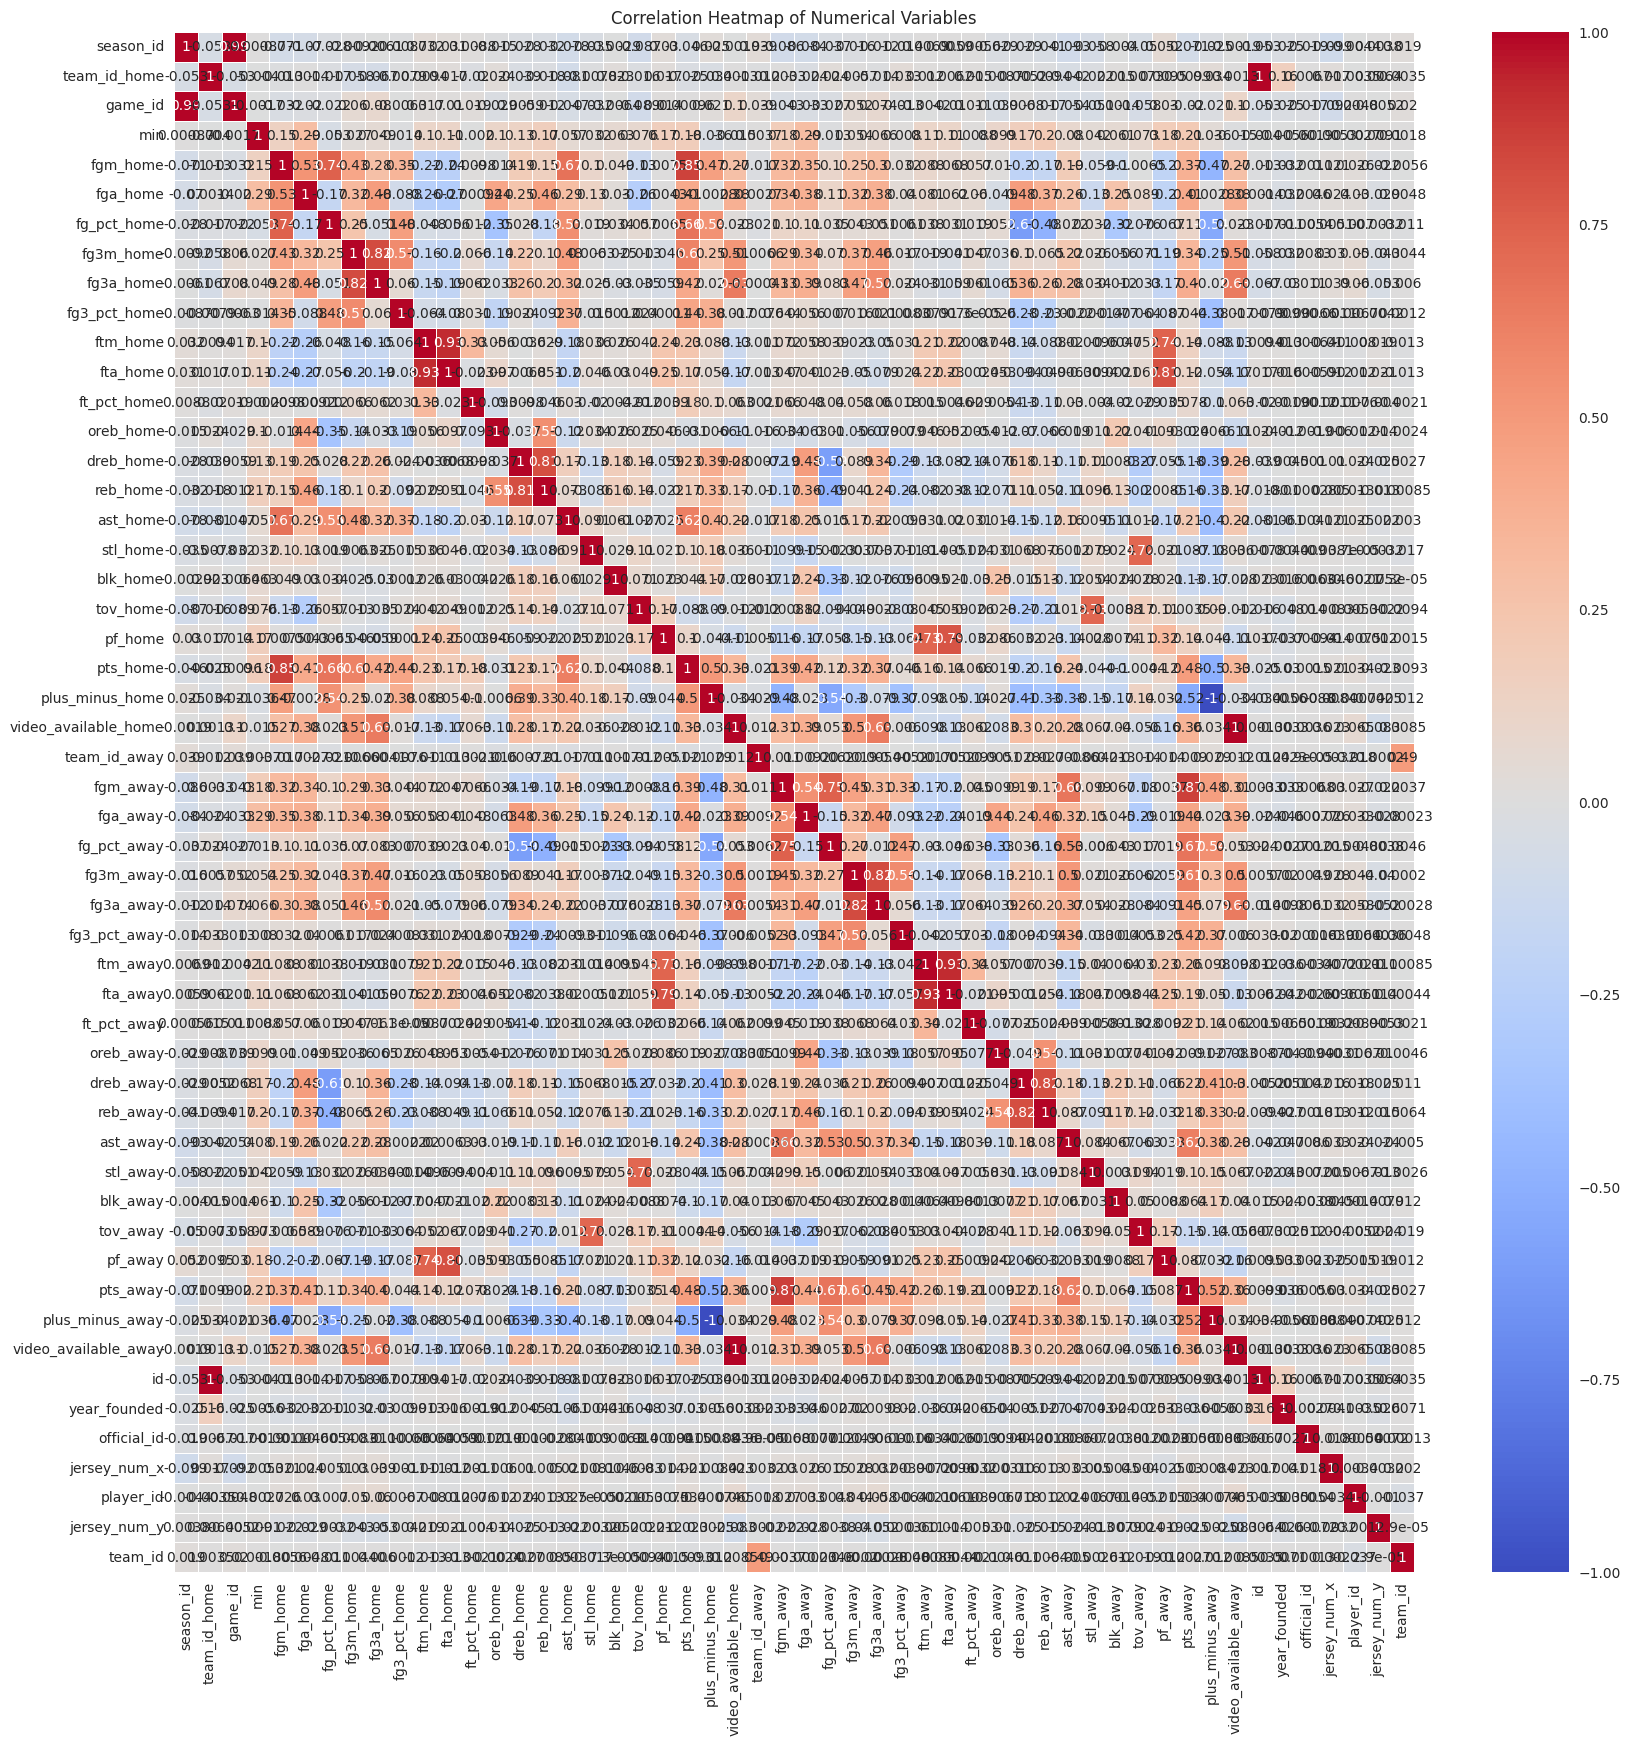

In [ ]:
# 5. Heatmap of correlations between numerical columns
numeric_cols = df_game_team_officials_inactive_players_details.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, 20))
sns.heatmap(df_game_team_officials_inactive_players_details[numeric_cols].corr(),
            annot=True, cmap='coolwarm',
            linewidths=0.5
)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

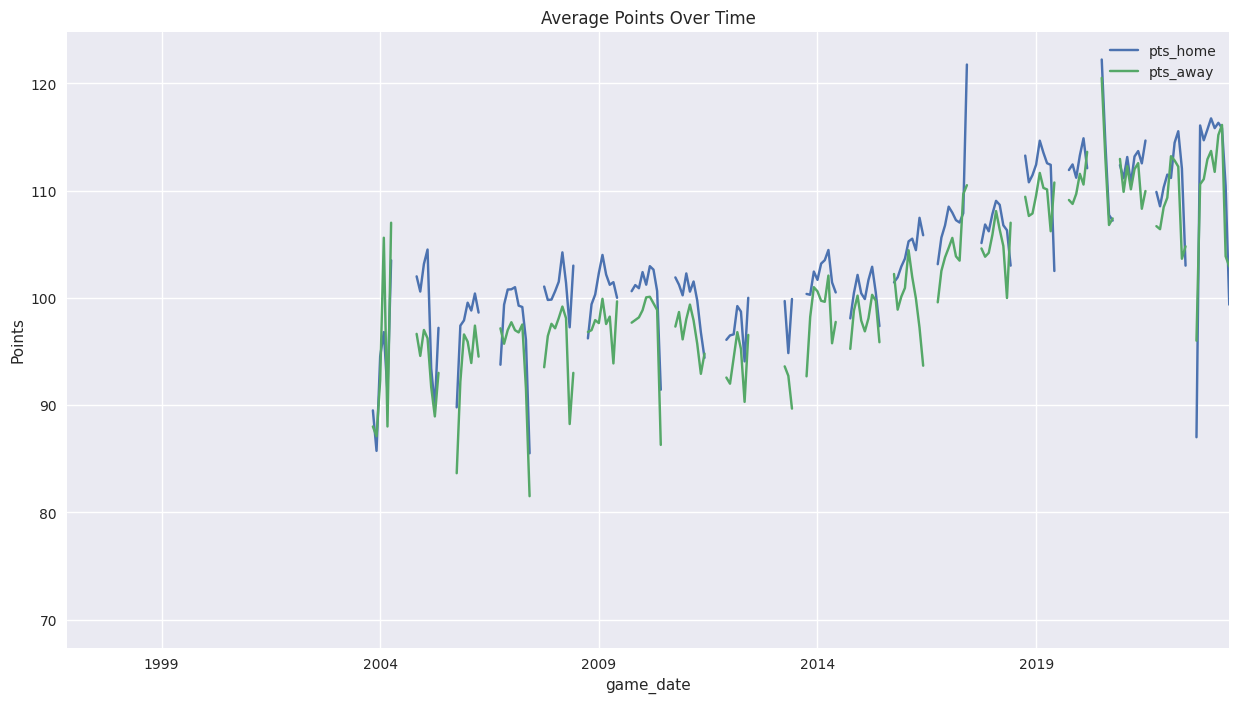

In [ ]:
# 6. Line plot of average points over time
df_game_team_officials_inactive_players_details['game_date'] = pd.to_datetime(
    df_game_team_officials_inactive_players_details['game_date']
)
df_game_team_officials_inactive_players_details.set_index('game_date', inplace=True)
df_game_team_officials_inactive_players_details.resample('M')[['pts_home', 'pts_away']].mean().plot(figsize=(15, 8))
plt.title('Average Points Over Time')
plt.ylabel('Points')
plt.show()

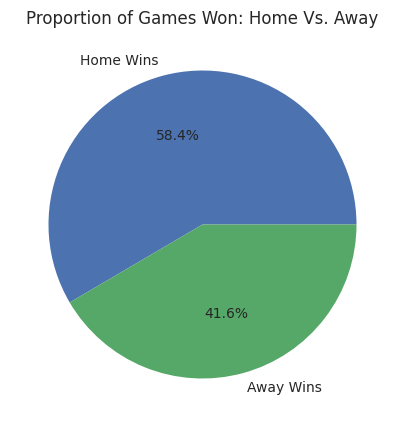

In [ ]:
# 7. Pie chart of games won by home vs. away teams
home_wins = (df_game_team_officials_inactive_players_details['wl_home'] == 'W').sum()
away_wins = (df_game_team_officials_inactive_players_details['wl_away'] == 'W').sum()
plt.figure(figsize=(5, 5))
plt.pie([home_wins, away_wins], labels=['Home Wins', 'Away Wins'], autopct='%1.1f%%')
plt.title('Proportion of Games Won: Home Vs. Away')
plt.show()

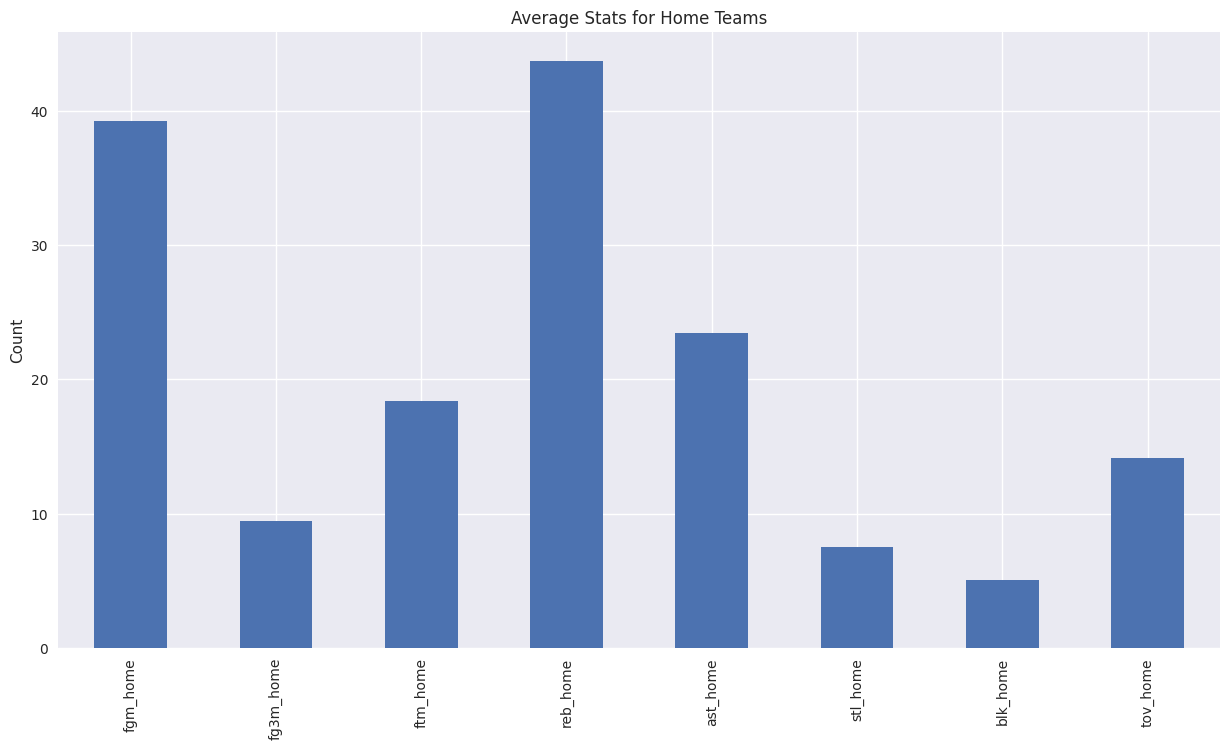

In [ ]:
# 8. Bar plot of average stats for home teams
stats = ['fgm_home', 'fg3m_home', 'ftm_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home']
plt.figure(figsize=(15, 8))
df_game_team_officials_inactive_players_details[stats].mean().plot(kind='bar')
plt.title('Average Stats for Home Teams')
plt.ylabel('Count')
plt.show()

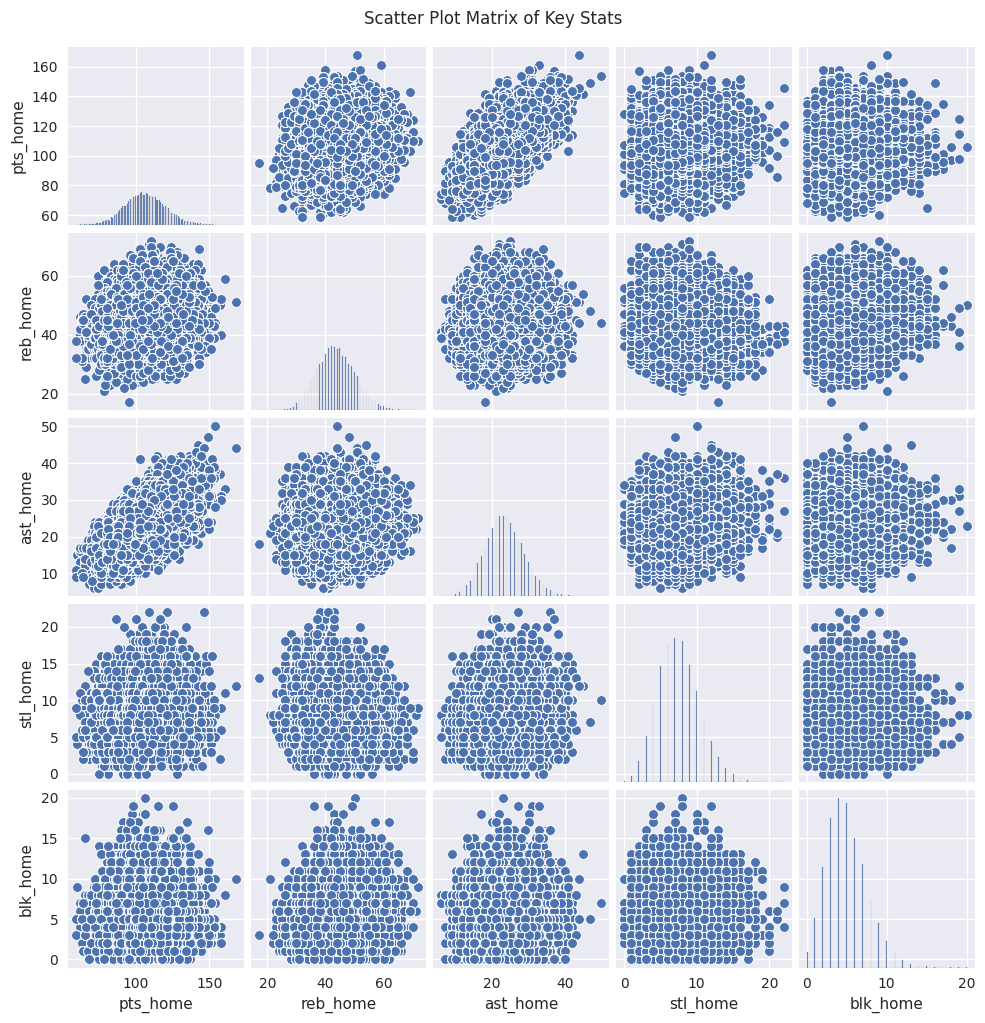

In [ ]:
# 9. Scatter plot matrix for key stats
key_stats = ['pts_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home']
sns.pairplot(df_game_team_officials_inactive_players_details[key_stats], height=2)
plt.suptitle('Scatter Plot Matrix of Key Stats', y=1.02)
plt.show()

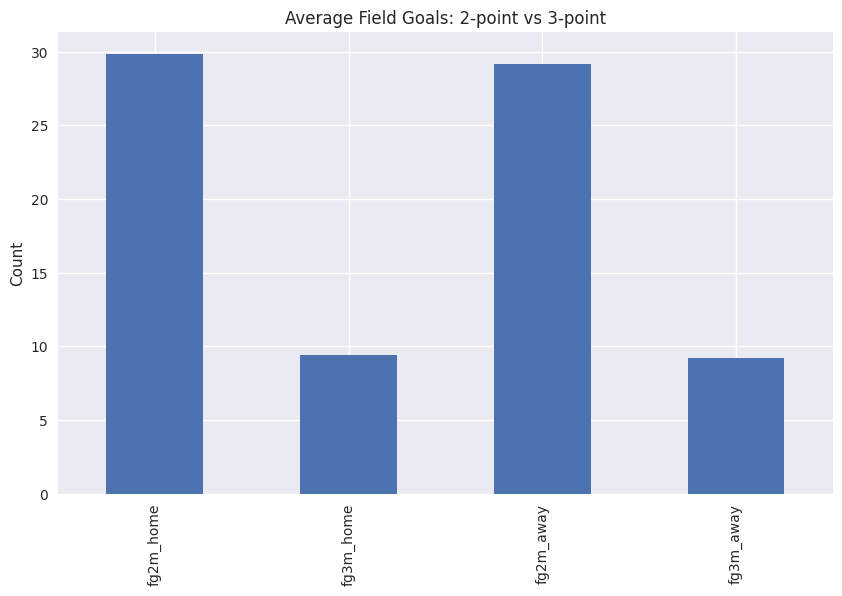

In [ ]:
# 10. Stacked bar chart of field goals (2pt vs 3pt)
df_game_team_officials_inactive_players_details['fg2m_home'] = df_game_team_officials_inactive_players_details['fgm_home'] - df_game_team_officials_inactive_players_details['fg3m_home']
df_game_team_officials_inactive_players_details['fg2m_away'] = df_game_team_officials_inactive_players_details['fgm_away'] - df_game_team_officials_inactive_players_details['fg3m_away']
fg_data = df_game_team_officials_inactive_players_details[['fg2m_home', 'fg3m_home', 'fg2m_away', 'fg3m_away']].mean()
fg_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Field Goals: 2-point vs 3-point')
plt.ylabel('Count')
plt.show()

# Insights, Conclusions and Recommendations

## Derived insights
1. Average points scored by home teams are more than away teams.
2. Points scored by home and away teams are highly correlated.
3. Points difference of home vs. away team is zero for approximately 2300 teams.
4. Seasons 22004 to 22021 has a lot of outliers in terms of home points scored.
5. Video available for home and away teams are totally correlated.
6. Game ID and Season ID are 90% correlated.
7. Points for away teams is quite higher than home teams in year 2004.
8. Games won by away teams are just 16.8% less than home teams.
9. Considering statistics for home teams, rebounds has the highest average value as 46.
10. Percent of home team's points and assists follows a linear trend.
11. Average 2-point goals for home teams are higher than away teams though average 3-point goals for home and away teams are the same.

## Final conclusions
1. Home Court Advantage: There is a clear home court advantage in terms of points scored and games won. This suggests that factors like familiar environment, crowd support and lack of travel fatigue positively impact home team performance.
2. Scoring Correlation: The high correlation between home and away team scores indicates that game outcomes are often close, suggesting competitive balance in the league.
3. Seasonal Variations: The presence of outliers in certain seasons (22004 to 22021) for home points scored suggests potential rule changes, strategic shifts or other factors affecting scoring patterns during these periods.
4. Video Availability: The perfect correlation in video availability for home and away teams indicates consistent broadcasting practices across the league.
5. Scoring Trends: The higher average of 2-point goals for home teams, coupled with equal 3-point averages, suggests that home teams may have an advantage in close-range scoring opportunities.
6. Statistical Relationships: The linear trend between points and assists for home teams indicates a fruitful coordination between home team players.

## Future recommendations
1. Team Strategy:
- Away teams should focus on strategies to mitigate the home court advantage such as mental preparation techniques or adjusted travel schedules.
- Home teams should capitalize on their advantage by emphasizing crowd engagement and maximizing familiarity with the home court.
2. Player Development:
- Teams should prioritize developing players' 2-point shooting skills as this appears to be a key differentiator for home team success.
- Maintain focus on 3-point shooting for both home and away games as this skill seems equally important in both contexts.
3. Game Analysis:
- Conduct a detailed analysis of the seasons with outlier performances (22004 to 22021) to understand the factors contributing to increased variability in home team scoring.
- Use the strong correlation between assists and points to emphasize team play and ball movement in offensive strategies.
4. League Operations:
- Investigate the factors contributing to the slight imbalance in home vs. away team wins (16.8% difference) to ensure fair competition.
- Maintain the current practices for video coverage as they appear to be consistently applied across all games.
5. Fan Engagement: Leverage the close correlation between home and away team scores in marketing efforts emphasizing the competitive nature of game to attract viewers.
6. Performance Metrics: Develop a composite metric that accounts for both 2-point and 3-point scoring efficiency, as well as home/away performance, to better evaluate team and player performance.
7. Further Research:
- Investigate the reasons behind the higher away team scores in 2004 to understand if this was an anomaly or part of a broader trend.
- Analyze the relationship between rebounds (highest average statistic) and overall team success to potentially inform coaching and recruitment strategies.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b52aef0d-fa8d-4af6-9e8c-874edb7f299a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>